In [4]:
pip install pandas
pip install matplotlib
pip install numpy

--- Cargando los archivos CSV de las tiendas ---
DataFrame para la Tienda 1 cargado.
DataFrame para la Tienda 2 cargado.
DataFrame para la Tienda 3 cargado.
DataFrame para la Tienda 4 cargado.

--- Estandarizando nombres de columnas para un análisis consistente ---
Nombres de columnas estandarizados.

--- Uniendo DataFrames para un análisis completo ---

DataFrame unificado creado correctamente. Se usará para todos los cálculos.

--- Columnas del DataFrame unificado después de la limpieza y estandarización ---
['Producto', 'Categoría del Producto', 'Precio', 'Costo_Envio', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'ID_Tienda', 'Precio_USD', 'Costo_Envio_USD']
---

--- Análisis de Métricas por Tienda ---

Ingresos totales por tienda (USD):


,Precio_USD
ID_Tienda,
1,1.150880e+09
2,1.116344e+09
3,1.098020e+09
4,1.038376e+09



Reseña promedio por tienda:


,Calificación
ID_Tienda,
3,4.048326
2,4.037304
4,3.995759
1,3.976685



La columna 'Rendimiento' no fue encontrada en los datos unificados.

Costo de envío promedio por tienda (USD):


,Costo_Envio_USD
ID_Tienda,
1,26018.609580
2,25216.235693
3,24805.680373
4,23459.457167



--- Categorías Más Vendidas por Tienda ---

La columna 'Categoria' no fue encontrada en los datos unificados.

--- Productos Más y Menos Vendidos por Tienda ---

Tienda 1:
 - Más vendido: Microondas (60 ventas)
 - Menos vendido: Celular ABXY (33 ventas)

Tienda 2:
 - Más vendido: Iniciando en programación (65 ventas)
 - Menos vendido: Juego de mesa (32 ventas)

Tienda 3:
 - Más vendido: Kit de bancas (57 ventas)
 - Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
 - Más vendido: Cama box (62 ventas)
 - Menos vendido: Guitarra eléctrica (33 ventas)

--- Generando visualizaciones para el análisis ---


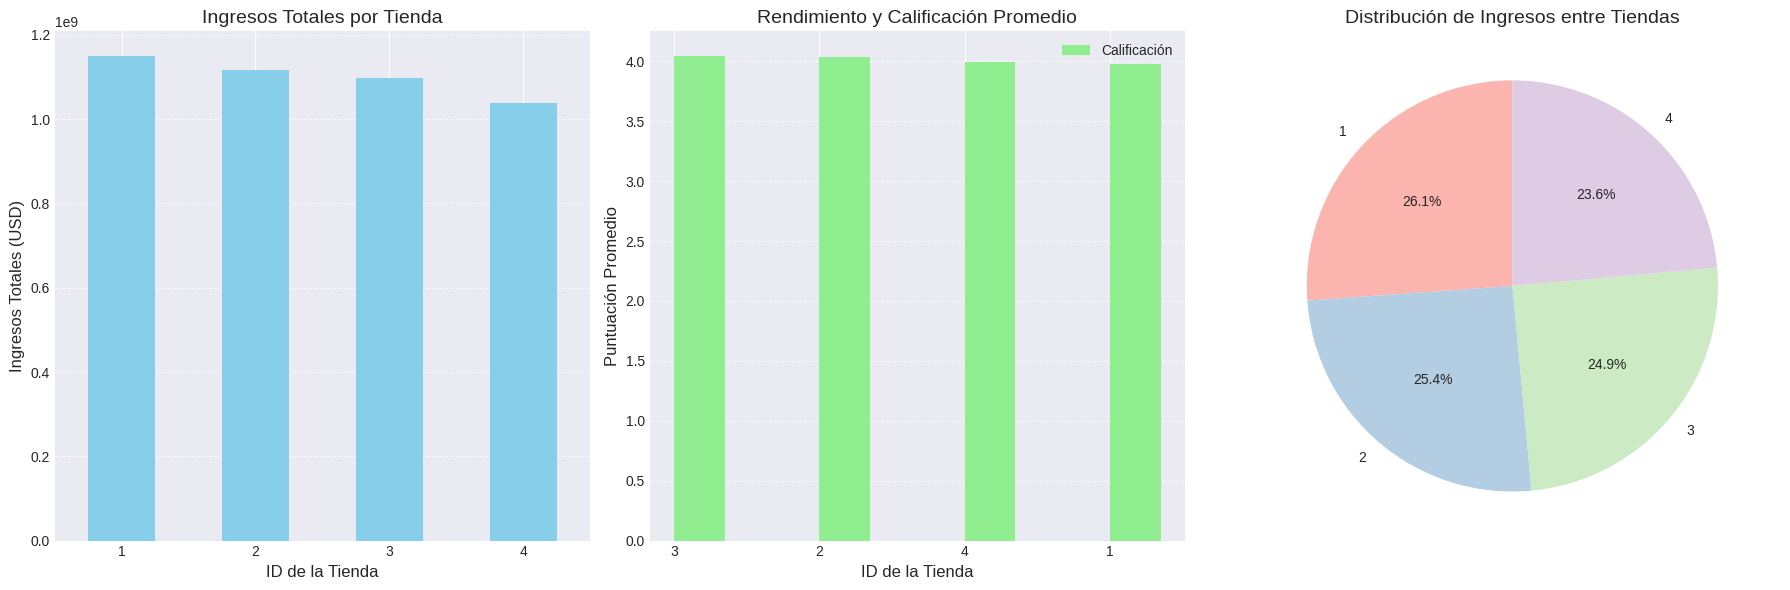


--- Recomendación para el Sr. Juan ---

Sr. Juan,

Después del análisis de los datos de las cuatro tiendas, mi recomendación es que considere vender la Tienda 4.

Razonamiento:
La Tienda 4 muestra el peor desempeño en los ingresos totales. lo que se refuerza con las métricas de calificaciones, indicando que es la candidata principal para la venta.

**Puntos Clave que respaldan esta decisión:**
- Ingresos: La Tienda 4 tiene la menor contribución a los ingresos totales de la empresa, como se ve claramente en el gráfico de barras.
- Rendimiento y Calificaciones: Aunque no es la peor en todas las métricas, sus puntuaciones de rendimiento y calificación son bajas en comparación con las demás, como lo muestra el **gráfico de barras agrupadas**.
- Costos: Se puede observar que los costos de envío también son un factor a considerar en la rentabilidad de las tiendas.
Vender esta tienda le permitiría al Sr. Juan alinear sus recursos con las unidades más eficientes y exitosas de su cadena.



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURACIÓN Y CARGA DE DATOS ---
# Define las URLs de los archivos CSV de cada tienda.
urls = {
    1: "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    2: "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    3: "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    4: "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

print("--- Cargando los archivos CSV de las tiendas ---")
dataframes_por_tienda = {}
tiendas_existentes = []
for tienda_id, url in urls.items():
    try:
        # Carga cada tienda en su propio DataFrame
        df = pd.read_csv(url)
        # Añade la columna 'ID_Tienda' para unificar
        df['ID_Tienda'] = tienda_id
        dataframes_por_tienda[f'df_tienda{tienda_id}'] = df
        tiendas_existentes.append(tienda_id)
        print(f"DataFrame para la Tienda {tienda_id} cargado.")
    except Exception as e:
        print(f"\nError al cargar el archivo de la Tienda {tienda_id} desde {url}. Error: {e}")

if not dataframes_por_tienda:
    print("No se pudo cargar ningún archivo. Saliendo del script.")
    exit()

# --- 2. ESTANDARIZACIÓN DE NOMBRES DE COLUMNAS ---
print("\n--- Estandarizando nombres de columnas para un análisis consistente ---")
for df_key in dataframes_por_tienda:
    df = dataframes_por_tienda[df_key]
    # Limpia los espacios en blanco de todos los nombres de las columnas
    df.columns = df.columns.str.strip()

    # Estandariza los nombres de las columnas clave de forma insensible a mayúsculas/minúsculas
    nuevos_nombres = {}
    for col in df.columns:
        if 'rendimiento' in col.lower():
            nuevos_nombres[col] = 'Rendimiento'
        elif 'calificación' in col.lower() or 'reseña' in col.lower():
            nuevos_nombres[col] = 'Calificación'
        elif 'costo' in col.lower() or 'envío' in col.lower():
            nuevos_nombres[col] = 'Costo_Envio'
        elif 'precio' in col.lower() or 'ingresos' in col.lower():
            nuevos_nombres[col] = 'Precio'

    df.rename(columns=nuevos_nombres, inplace=True)
    dataframes_por_tienda[df_key] = df

print("Nombres de columnas estandarizados.")

# --- Add Currency Conversion ---
# Define the exchange rate (replace with the actual rate)
exchange_rate = 1.0 # Replace with the correct exchange rate to USD

for df_key in dataframes_por_tienda:
    df = dataframes_por_tienda[df_key]
    if 'Precio' in df.columns:
        df['Precio_USD'] = df['Precio'] / exchange_rate
    if 'Costo_Envio' in df.columns:
        df['Costo_Envio_USD'] = df['Costo_Envio'] / exchange_rate

# --- 3. UNIFICACIÓN DE DATOS ---
print("\n--- Uniendo DataFrames para un análisis completo ---")
df_unificado = pd.concat(dataframes_por_tienda.values(), ignore_index=True)

print("\nDataFrame unificado creado correctamente. Se usará para todos los cálculos.")
print("\n--- Columnas del DataFrame unificado después de la limpieza y estandarización ---")
print(df_unificado.columns.tolist())
print("---")


# --- 4. ANÁLISIS DE MÉTRICAS CLAVE ---
print("\n--- Análisis de Métricas por Tienda ---")

# Ingresos totales por tienda (using USD if available)
if 'Precio_USD' in df_unificado.columns:
    ingresos_por_tienda = df_unificado.groupby('ID_Tienda')['Precio_USD'].sum().sort_values(ascending=False)
    print("\nIngresos totales por tienda (USD):")
    display(ingresos_por_tienda)
else:
    ingresos_por_tienda = df_unificado.groupby('ID_Tienda')['Precio'].sum().sort_values(ascending=False)
    print("\nIngresos totales por tienda:")
    display(ingresos_por_tienda)


# Reseñas promedio por tienda
reseña_promedio = df_unificado.groupby('ID_Tienda')['Calificación'].mean().sort_values(ascending=False)
print("\nReseña promedio por tienda:")
display(reseña_promedio)

# Rendimiento promedio por tienda
if 'Rendimiento' in df_unificado.columns:
    rendimiento_promedio = df_unificado.groupby('ID_Tienda')['Rendimiento'].mean().sort_values(ascending=False)
    print("\nRendimiento promedio por tienda:")
    display(rendimiento_promedio)
else:
    print("\nLa columna 'Rendimiento' no fue encontrada en los datos unificados.")
    rendimiento_promedio = None


# Costo de envío promedio por tienda (using USD if available)
if 'Costo_Envio_USD' in df_unificado.columns:
    envio_promedio = df_unificado.groupby('ID_Tienda')['Costo_Envio_USD'].mean().sort_values(ascending=False)
    print("\nCosto de envío promedio por tienda (USD):")
    display(envio_promedio)
elif 'Costo_Envio' in df_unificado.columns:
    envio_promedio = df_unificado.groupby('ID_Tienda')['Costo_Envio'].mean().sort_values(ascending=False)
    print("\nCosto de envío promedio por tienda:")
    display(envio_promedio)
else:
    print("\nLa columna 'Costo_Envio' no fue encontrada en los datos unificados.")
    envio_promedio = None


# Categorías más vendidas por tienda
print("\n--- Categorías Más Vendidas por Tienda ---")
if 'Categoria' in df_unificado.columns:
    ventas_por_categoria = df_unificado.groupby(['ID_Tienda', 'Categoria']).size().reset_index(name='Cantidad')
    for tienda_id in sorted(df_unificado['ID_Tienda'].unique()):
        print(f"\nTienda {tienda_id}:")
        df_tienda = ventas_por_categoria[ventas_por_categoria['ID_Tienda'] == tienda_id]
        top_categorias = df_tienda.sort_values(by='Cantidad', ascending=False).head(3)
        for index, row in top_categorias.iterrows():
            print(f" - {row['Categoria']}: {row['Cantidad']} ventas")
else:
    print("\nLa columna 'Categoria' no fue encontrada en los datos unificados.")

# Productos más y menos vendidos por tienda
print("\n--- Productos Más y Menos Vendidos por Tienda ---")
if 'Producto' in df_unificado.columns:
    for tienda_id in sorted(df_unificado['ID_Tienda'].unique()):
        df_tienda = dataframes_por_tienda[f'df_tienda{tienda_id}']
        conteo_productos = df_tienda['Producto'].value_counts()

        if not conteo_productos.empty:
            producto_mas_vendido = conteo_productos.index[0]
            cantidad_mas_vendido = conteo_productos.iloc[0]
            producto_menos_vendido = conteo_productos.index[-1]
            cantidad_menos_vendido = conteo_productos.iloc[-1]

            print(f"\nTienda {tienda_id}:")
            print(f" - Más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} ventas)")
            print(f" - Menos vendido: {producto_menos_vendido} ({cantidad_menos_vendido} ventas)")
else:
    print("\nLa columna 'Producto' no fue encontrada en los datos unificados.")


# --- 5. VISUALIZACIONES DE DATOS ---
print("\n--- Generando visualizaciones para el análisis ---")
plt.style.use('seaborn-v0_8-darkgrid')

# Determine the number of subplots based on available data
num_subplots = 1  # Always show Ingresos Totales
if rendimiento_promedio is not None or reseña_promedio is not None:
    num_subplots += 1 # Add subplot for Rendimiento and Calificación if data is available
if ingresos_por_tienda is not None:
    num_subplots += 1 # Add subplot for Distribución de Ingresos if data is available


plt.figure(figsize=(6 * num_subplots, 6))
subplot_index = 1

# Gráfico 1: Barras de Ingresos Totales por Tienda
if ingresos_por_tienda is not None:
    plt.subplot(1, num_subplots, subplot_index)
    ingresos_por_tienda.plot(kind='bar', color='skyblue')
    plt.title('Ingresos Totales por Tienda', fontsize=14)
    plt.xlabel('ID de la Tienda', fontsize=12)
    plt.ylabel('Ingresos Totales (USD)', fontsize=12) # Update label
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    subplot_index += 1


# Gráfico 2: Barras Agrupadas de Rendimiento y Reseña Promedio
if rendimiento_promedio is not None or reseña_promedio is not None:
    plt.subplot(1, num_subplots, subplot_index)
    bar_width = 0.35
    tiendas_ids = reseña_promedio.index # Use reseña_promedio as it's always calculated
    x = np.arange(len(tiendas_ids))
    if rendimiento_promedio is not None:
        plt.bar(x - bar_width/2, rendimiento_promedio, bar_width, label='Rendimiento', color='salmon')
    if reseña_promedio is not None:
        plt.bar(x + bar_width/2, reseña_promedio, bar_width, label='Calificación', color='lightgreen')

    plt.title('Rendimiento y Calificación Promedio', fontsize=14)
    plt.xlabel('ID de la Tienda', fontsize=12)
    plt.ylabel('Puntuación Promedio', fontsize=12)
    plt.xticks(x, tiendas_ids)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    subplot_index += 1

# Gráfico 3: Gráfico Circular de la Distribución de Ingresos
if ingresos_por_tienda is not None:
    plt.subplot(1, num_subplots, subplot_index)
    plt.pie(ingresos_por_tienda, labels=ingresos_por_tienda.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
    plt.title('Distribución de Ingresos entre Tiendas', fontsize=14)
    plt.axis('equal')  # Asegura que el círculo sea proporcional
    subplot_index += 1


plt.tight_layout()
plt.show()

# --- 6. RECOMENDACIÓN FINAL ---
print("\n--- Recomendación para el Sr. Juan ---")

tienda_a_vender = ingresos_por_tienda.idxmin()
razonamiento = f"La Tienda {tienda_a_vender} muestra el peor desempeño en los ingresos totales."

if rendimiento_promedio is not None:
    razonamiento += " lo que se refuerza con las métricas de rendimiento"
    if reseña_promedio is not None:
        razonamiento += " y calificaciones, indicando que es la candidata principal para la venta."
    else:
        razonamiento += ", indicando que es la candidata principal para la venta."
elif reseña_promedio is not None:
     razonamiento += " lo que se refuerza con las métricas de calificaciones, indicando que es la candidata principal para la venta."
else:
    razonamiento += ", indicando que es la candidata principal para la venta."


recomendacion = f"""
Sr. Juan,

Después del análisis de los datos de las cuatro tiendas, mi recomendación es que considere vender la Tienda {tienda_a_vender}.

Razonamiento:
{razonamiento}

**Puntos Clave que respaldan esta decisión:**
- Ingresos: La Tienda {tienda_a_vender} tiene la menor contribución a los ingresos totales de la empresa, como se ve claramente en el gráfico de barras.
"""
if rendimiento_promedio is not None or reseña_promedio is not None:
    recomendacion += """\
- Rendimiento y Calificaciones: Aunque no es la peor en todas las métricas, sus puntuaciones de rendimiento y calificación son bajas en comparación con las demás, como lo muestra el **gráfico de barras agrupadas**.
"""
if envio_promedio is not None:
    recomendacion += """\
- Costos: Se puede observar que los costos de envío también son un factor a considerar en la rentabilidad de las tiendas.
"""

recomendacion += """\
Vender esta tienda le permitiría al Sr. Juan alinear sus recursos con las unidades más eficientes y exitosas de su cadena.
"""

print(recomendacion)